# Polynomial regression

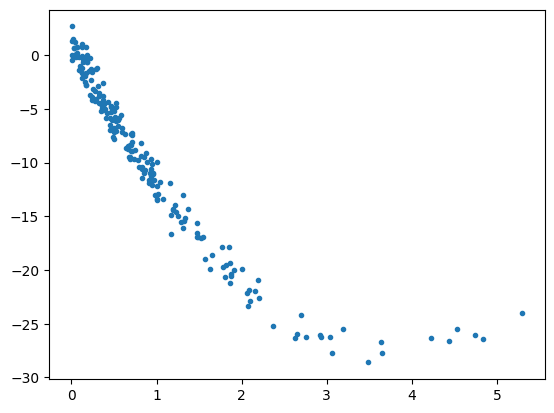

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(101)
#x[:, None]               # shape: (3, 1) <- 2d (single column matrix)
#x[:, np.newaxis]         # shape: (3, 1) <- a meaningful alias to None
#x.reshape(-1, 1)         # shape: (3, 1)

# set number of points
N = 200

# generate sample data (exponential)
X = np.random.exponential(scale=1.0, size=N)

# generate (oracle) quadratic target function
y = 2 * X**2 + -15.2 * X + 1 + np.random.randn(N)

# create (quadratic) data matrix
X0 = np.ones(N)
Xnew = np.stack((X0, X, X**2, X**3), axis=1)

# plot points
plt.plot(X, y, '.')

In [5]:

# find closed form solution
w = np.dot(np.linalg.inv(np.dot(np.transpose(Xnew), Xnew)), np.dot(np.transpose(Xnew), y))


In [6]:
w

array([ 9.83148680e-01, -1.50619281e+01,  1.97145215e+00, -1.95669391e-03])

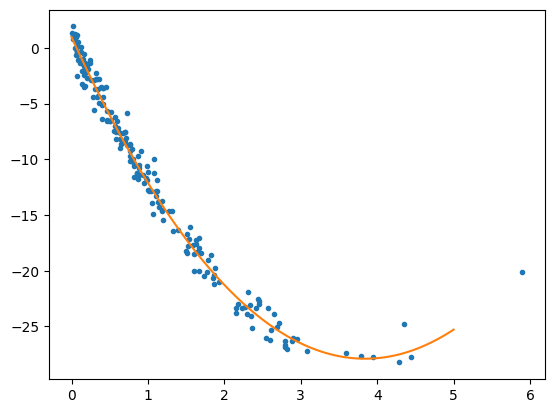

In [7]:

# generate grid of points
x_grid = np.linspace(0, 5, 100)

# plot line
plt.plot(X, y, '.')
plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2] + x_grid**3 * w[3])

# Compare closed form solutions (with different packages)

In [8]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# generate sample data (single linear)
X = 5 * np.random.rand(200, 1)
y = 1.2 * X + 1 + 0.8 * np.random.randn(200, 1)
X_ = sm.add_constant(X)  # add constant for intercept computation

# find closed form solution 
w = np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, y))

print('Method 1: matrix formulation')
print(np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, y)))

# statsmodels lib
model = sm.OLS(y, X_).fit()
print('Method 2: statsmodels')
print(f'{model.params}')

# LinearRegression
print('Method 3: sklearn.linear_model.LinearRegression')
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X, y)
print(f'Intercept: {lr_model.intercept_}, coeff: {lr_model.coef_}')

Method 1: matrix formulation
[[1.11436293]
 [1.17285675]]
Method 2: statsmodels
[1.11436293 1.17285675]
Method 3: sklearn.linear_model.LinearRegression
Intercept: [1.11436293], coeff: [[1.17285675]]


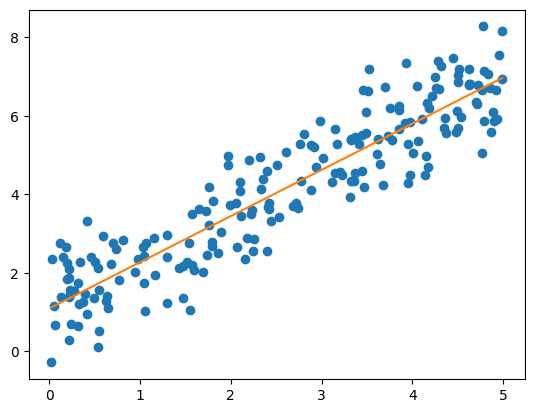

In [9]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'o')
plt.plot([min(X[:,0]), max(X[:,0])], [w[0], max(X[:,0]) * w[1] + w[0]])